In [2]:
#import packages
from skimage.metrics import structural_similarity
#it will compare the structural similarities between original and tampered image
import cv2
#required for all image processing tasks
from PIL import Image
#it will convert the image into array
import imutils
#it will resize the image
import requests
#to download the image

In [3]:
#create directory
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

A subdirectory or file pan_card_tampering already exists.
The syntax of the command is incorrect.


In [4]:
#open the image and display
original = Image.open(requests.get('https://thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

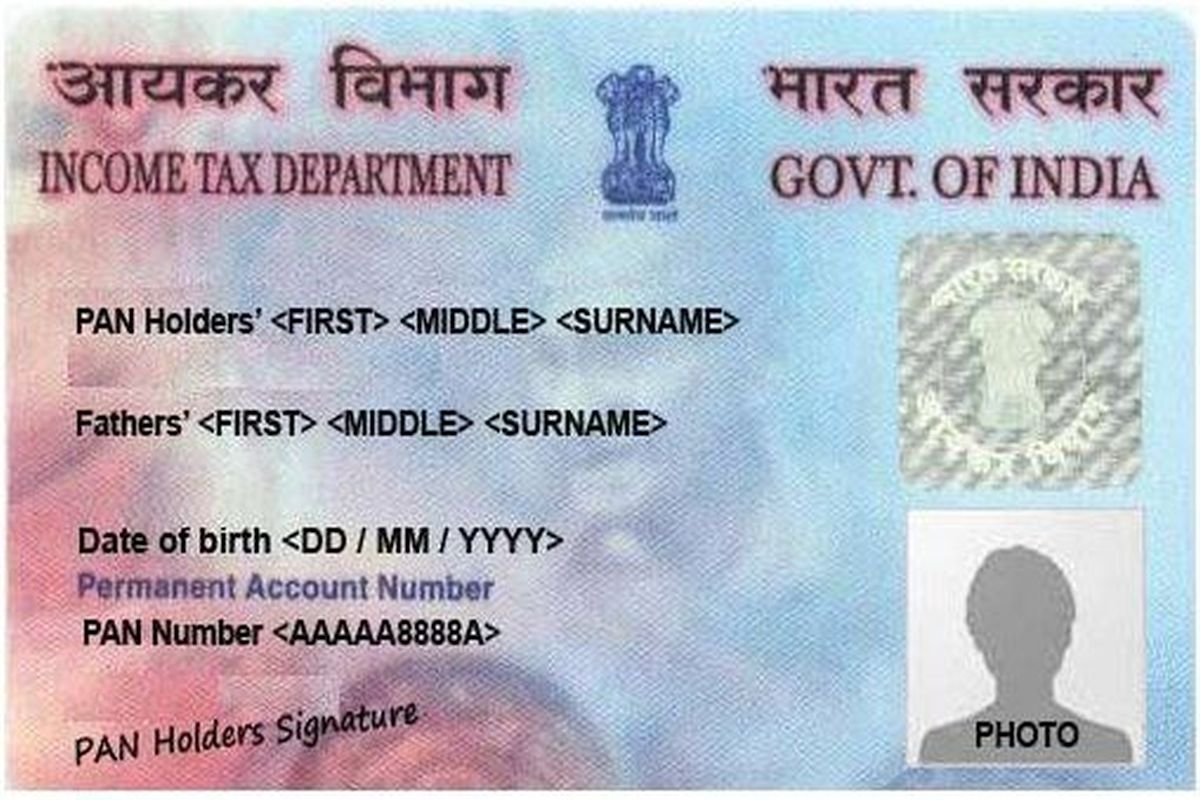

In [5]:
#display the image
original

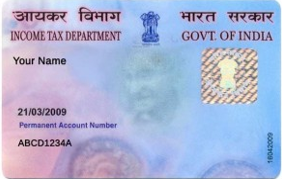

In [6]:
tampered

In [7]:
#check image format and size
print(f'the Original image format is {original.format} and size is {original.size}')
print(f'the Tampered image format is {tampered.format} and size is {tampered.size}')

the Original image format is JPEG and size is (1200, 800)
the Tampered image format is PNG and size is (282, 179)


In [8]:
#resize both images into same size
original_f = original.resize((300, 300))
original_f.save('pan_card_tampering/image/original.png')
tampered_f = tampered.resize((300, 300))
tampered_f.save('pan_card_tampering/image/tampered.png')

In [9]:
#check image format and size
print(f'the Original image format is {original_f.format} and size is {original_f.size}')
print(f'the Tampered image format is {tampered_f.format} and size is {tampered_f.size}')

the Original image format is None and size is (300, 300)
the Tampered image format is None and size is (300, 300)


In [10]:
#load the images using cv2
original_cv = cv2.imread('pan_card_tampering/image/original.png')
tampered_cv = cv2.imread('pan_card_tampering/image/tampered.png')

In [11]:
original_cv

array([[[254, 255, 253],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [252, 253, 255],
        [250, 253, 254],
        [250, 254, 255]],

       [[255, 255, 254],
        [254, 254, 253],
        [252, 253, 251],
        ...,
        [252, 252, 253],
        [250, 252, 253],
        [250, 254, 255]],

       [[255, 255, 254],
        [252, 253, 251],
        [249, 250, 248],
        ...,
        [248, 249, 247],
        [248, 249, 249],
        [249, 252, 252]],

       ...,

       [[252, 253, 250],
        [250, 253, 252],
        [250, 252, 255],
        ...,
        [255, 255, 250],
        [253, 252, 247],
        [252, 253, 248]],

       [[252, 253, 249],
        [252, 254, 252],
        [251, 253, 255],
        ...,
        [255, 255, 253],
        [251, 253, 249],
        [251, 253, 249]],

       [[254, 254, 250],
        [253, 254, 252],
        [252, 254, 254],
        ...,
        [253, 255, 254],
        [252, 255, 254],
        [252, 255, 254]]

In [12]:
tampered_cv

array([[[255, 253, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [252, 253, 248],
        [254, 252, 251],
        [255, 254, 255]],

       [[255, 253, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [253, 254, 248],
        [253, 252, 250],
        [255, 254, 255]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [255, 255, 247],
        [252, 251, 248],
        [255, 253, 254]],

       ...,

       [[255, 255, 252],
        [253, 254, 252],
        [252, 252, 252],
        ...,
        [255, 254, 244],
        [255, 255, 250],
        [254, 255, 253]],

       [[255, 255, 253],
        [254, 255, 252],
        [253, 254, 253],
        ...,
        [255, 254, 247],
        [254, 254, 251],
        [249, 253, 251]],

       [[255, 255, 254],
        [255, 255, 252],
        [254, 255, 253],
        ...,
        [255, 254, 249],
        [253, 253, 251],
        [246, 251, 250]]

In [13]:
#check image format and size
print(f'the Original image size is {original_cv.shape}')
print(f'the Tampered image size is {tampered_cv.shape}')

the Original image size is (300, 300, 3)
the Tampered image size is (300, 300, 3)


In [14]:
#convert images into grayscale
original_gray = cv2.cvtColor(original_cv, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered_cv, cv2.COLOR_BGR2GRAY)

In [15]:
original_gray

array([[254, 255, 255, ..., 253, 253, 254],
       [255, 254, 252, ..., 252, 252, 254],
       [255, 252, 249, ..., 248, 249, 252],
       ...,
       [252, 252, 253, ..., 254, 251, 251],
       [252, 253, 253, ..., 254, 252, 252],
       [253, 253, 254, ..., 254, 254, 254]], dtype=uint8)

In [16]:
tampered_gray

array([[254, 254, 254, ..., 251, 252, 254],
       [254, 254, 254, ..., 252, 252, 254],
       [254, 254, 254, ..., 253, 250, 254],
       ...,
       [254, 253, 252, ..., 251, 254, 254],
       [254, 254, 254, ..., 252, 253, 252],
       [255, 254, 254, ..., 253, 252, 250]], dtype=uint8)

In [17]:
#check image format and size
print(f'the Original image size is {original_gray.shape}')
print(f'the Tampered image size is {tampered_gray.shape}')

the Original image size is (300, 300)
the Tampered image size is (300, 300)


In [21]:
#calculate structural similarity index
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)

#calculate the difference
diff = (diff * 255).astype("uint8")

print("SSIM: {}".format(score))

SSIM: 0.32663749893361094


In [19]:
diff

array([[235, 235, 229, ...,  96, 167, 233],
       [236, 230, 221, ...,  88, 122, 201],
       [232, 219, 209, ...,  85,  91, 150],
       ...,
       [108, 158, 178, ..., 160, 149, 104],
       [117, 151, 165, ..., 136, 133,  87],
       [206, 208, 160, ...,  88, 129, 122]], dtype=uint8)

In [20]:
#display the images
cv2.imshow("Original", original_cv)
cv2.imshow("Tampered", tampered_cv)
cv2.imshow("Difference", diff)
cv2.waitKey(0)

-1

In [22]:
#calculate thresholds and contours
threshold = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [23]:
#loop over the contours

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original_cv, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered_cv, (x, y), (x + w, y + h), (0, 0, 255), 2)

In [24]:
#display the images
cv2.imshow("Original", original_cv)
cv2.imshow("Tampered", tampered_cv)
cv2.imshow("Difference", diff)
cv2.waitKey(0)

-1

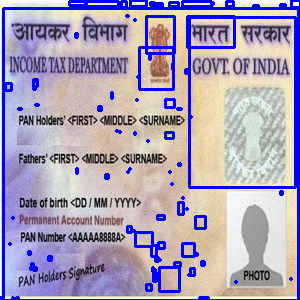

In [25]:
#display the images
Image.fromarray(original_cv)

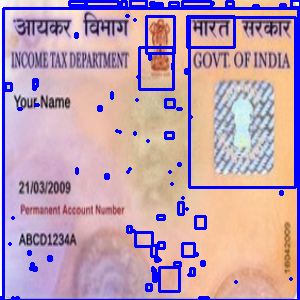

In [26]:
Image.fromarray(tampered_cv)

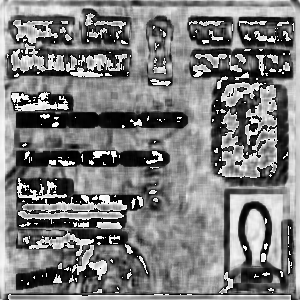

In [27]:
Image.fromarray(diff)

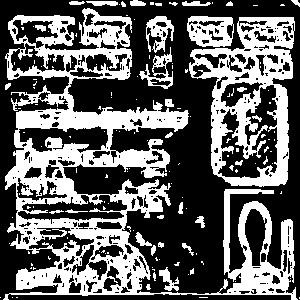

In [28]:
Image.fromarray(threshold)